In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
JC240_data = pd.read_csv('JC240_data.csv')
JC241_data = pd.read_csv('JC241_data.csv')

# Show data
JC240_data.head()
JC241_data.head()

,Session_ID,Flavor,Arm,Correct,CorrectBool
0,1,H,3,N,0
1,1,H,7,Y,1
2,1,H,4,N,0
3,1,H,7,Y,1
4,1,H,2,N,0


In [9]:
# Calculate accuracy for over all sessions for a given animal
def get_accuracy(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID")
    sessions = bysession_JCxxx["Session_ID"].unique()
    accuracy = np.zeros(len(sessions))
    for session in range(1, len(sessions)+1):
        accuracy[session-1] = round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count()[0]*100, 0)
    return accuracy, sessions
    
accuracy_JC240, sessions_JC240 = get_accuracy("JC240")
accuracy_JC241, sessions_JC241 = get_accuracy("JC241")

In [32]:
# Calculate arm choice by session

def get_arm_choice(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # get data
    data_JCxxx = globals()[data_JCxxx] # turn into variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID") # group by session
    sessions = bysession_JCxxx["Session_ID"].unique() # list sessions
    arms = np.array([3, 7]) # list arms of interest
    num_arms = len(arms) # count arms
    arm_choice = np.zeros((len(sessions), num_arms+1)) # make a vector that will hold arm choice for each session
                                                        # and add another column for other arms
    for session in range(1, len(sessions)+1): # iterate over sessions, starting at 1 instead of 0
        num_trials = bysession_JCxxx.get_group(session).count()[0] # count number of trials per session
        for arm in range(num_arms): # iterate over arms by indexing numpy array
            this_session = bysession_JCxxx.get_group(session)
            choices_bool = this_session["Arm"]==(arms[arm]) # Boolean of whether arm was chosen
            count = len(choices_bool[choices_bool==True])
            arm_choice[session-1][arm] = count
        arm_choice[session-1][-1] = num_trials - arm_choice[session-1][0] - arm_choice[session-1][1]
                                    # for last column subtract arms of interest from total trials
    return arm_choice

arm_choice = get_arm_choice("JC240")
print(arm_choice)

[[14.  5.  7.]
 [15. 16.  7.]
 [32. 13.  5.]
 [36. 31.  3.]
 [23. 47.  0.]
 [44. 26.  0.]
 [32. 38.  0.]
 [31. 39.  0.]
 [30. 21.  5.]
 [24. 35. 10.]
 [30. 31.  8.]
 [25. 23. 21.]
 [19. 16. 34.]
 [22. 20. 27.]
 [23. 23. 23.]
 [23. 22. 24.]]


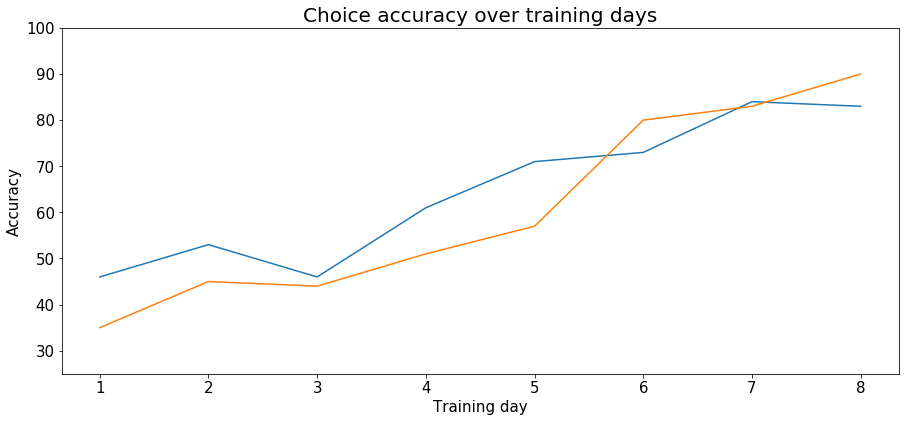

In [33]:
# Plot accuracy and arm choice before third flavor introduced
fig = plt.figure(figsize=(15,14))

# Accuracy
ax1 = fig.add_subplot(211)
ax1.plot(sessions_JC240[0:8], accuracy_JC240[0:8])
ax1.plot(sessions_JC241[0:8], accuracy_JC241[0:8])
ax1.set_title("Choice accuracy over training days", fontsize=20)
ax1.set_xlabel("Training day", fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_ylabel("Accuracy", fontsize=15)
# ax1.yaxis.set_major_formatter('{x:,.0f}%') this doesn't run on home computer
ax1.set_ylim(25,100)

plt.show()